<a href="https://colab.research.google.com/github/ALOK158/Neural_Network_TensorFlow/blob/main/Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import tensorflow as tf


#Introduction to CNN and computer vision

Computer vision is pracrise of writing algorithmms which can discover pattern in visual data.

We are using food101 dataset and modified to get  only pizza and steak

## Get the data

In [61]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-01-24 17:43:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.207, 142.251.170.207, 173.194.174.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M  26.7MB/s    in 4.8s    

2025-01-24 17:43:48 (21.6 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



In [62]:
#Unzip
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

##Inspect the data( become one with it)

A very crucial step at the beginning of any machine learning project is  becoming one with data


In [63]:
!ls pizza_steak

test  train


In [64]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [65]:
##
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directoreis and {len(filenames)} images in '{dirpath}' ")



There are 2 directoreis and 0 images in 'pizza_steak' 
There are 2 directoreis and 0 images in 'pizza_steak/test' 
There are 0 directoreis and 250 images in 'pizza_steak/test/steak' 
There are 0 directoreis and 250 images in 'pizza_steak/test/pizza' 
There are 2 directoreis and 0 images in 'pizza_steak/train' 
There are 0 directoreis and 750 images in 'pizza_steak/train/steak' 
There are 0 directoreis and 750 images in 'pizza_steak/train/pizza' 


In [66]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jan 24 17:26 .
drwxr-xr-x 1 root root 4096 Jan 24 17:43 ..
drwxr-xr-x 4 root root 4096 Jan 24 17:26 test
drwxr-xr-x 4 root root 4096 Jan 24 17:26 train


In [67]:
##Another way to find out many images are in file

num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [68]:
#get the classname programmati
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [69]:
#Lets visualize it
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape:{img.shape}")
  return img

Image shape:(342, 512, 3)


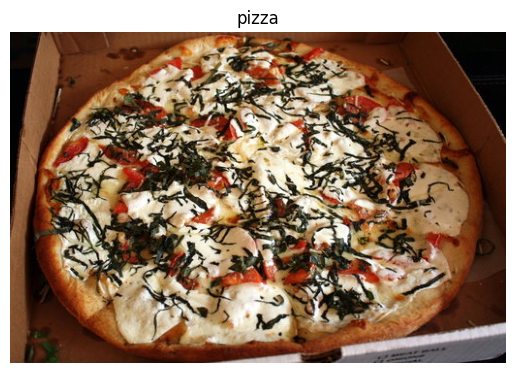

In [70]:
#view the random image from traininig dataset
img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [71]:
# view the image shape
img.shape  #returns width, height , colour channels

(342, 512, 3)

In [72]:
# get all pixel values in range 0-1
img/255.

array([[[0.03529412, 0.01960784, 0.00784314],
        [0.03921569, 0.02352941, 0.01176471],
        [0.03921569, 0.02352941, 0.01176471],
        ...,
        [0.01176471, 0.00784314, 0.        ],
        [0.01176471, 0.00392157, 0.00784314],
        [0.01176471, 0.00392157, 0.00784314]],

       [[0.03529412, 0.01960784, 0.00784314],
        [0.03529412, 0.01960784, 0.00784314],
        [0.03529412, 0.01960784, 0.00784314],
        ...,
        [0.01176471, 0.00784314, 0.        ],
        [0.01176471, 0.00392157, 0.00784314],
        [0.01176471, 0.00392157, 0.00784314]],

       [[0.03529412, 0.01960784, 0.00784314],
        [0.03529412, 0.01960784, 0.00784314],
        [0.03921569, 0.02352941, 0.01176471],
        ...,
        [0.01176471, 0.00784314, 0.        ],
        [0.01176471, 0.00392157, 0.00784314],
        [0.01568627, 0.00784314, 0.01176471]],

       ...,

       [[0.43529412, 0.25882353, 0.1372549 ],
        [0.43137255, 0.25490196, 0.13333333],
        [0.43529412, 0

**Note** -All neural network model works much better if they input values between 0-1. This can be achieved by noromalization.
Dividing pixl values of image by 255 as it is max pixel value


## Lets have our CNN model
Things to be care of

*Load our images
*Preprocess the image
*


In [73]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocess data to get all pixel values between 0 and 1
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen= ImageDataGenerator(rescale=1./255)

#setup path to get our data directories

test_dir="/content/pizza_steak/test"
train_dir="/content/pizza_steak/train"


#Import datas from directories and turn them into batches

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                   batch_size=32,
                                   target_size=(224,224),
                                   class_mode="binary", ## as we are working with tow classes
                                   seed=42)## default value, 224 always hold good amount of info still
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

##build the CNN model-can cehck tiny VGG on CNN explainer website
model_1=tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=10,
                               kernel_size=3,
                               activation="relu",
                               input_shape=(224,224,3)),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2,
                                  padding="valid"),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile our cnn
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
 #fit the model
history_1=model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
            )




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.5320 - loss: 0.7067 - val_accuracy: 0.6980 - val_loss: 0.5503
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6980 - val_loss: 0.5503
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7641 - loss: 0.5013 - val_accuracy: 0.8120 - val_loss: 0.3958
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8120 - val_loss: 0.3958
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8428 - loss: 0.3923 - val_accuracy: 0.8120 - val_loss: 0.4017


Check out-**CNN-Explainer** website

In [74]:
len(train_data)
1500/32#beacuse we have batch size of 32 ->so that whole donot load up at once and carry up whole space

46.875

<Axes: >

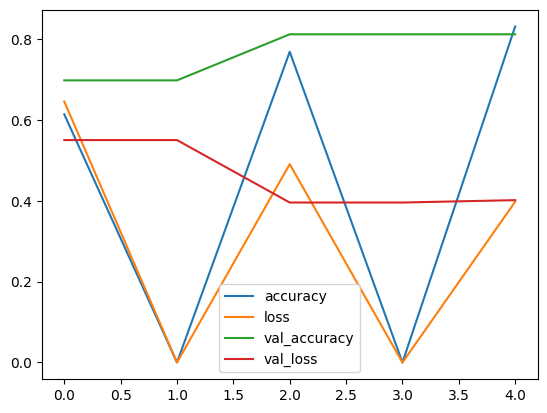

In [75]:
 import pandas as pd
 pd.DataFrame(history_1.history).plot()

In [76]:
model_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │          29,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,785 (366.35 KB)

 Trainable params: 31,261 (122.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,524 (244.24 KB)

##Using the same model as before

Lets replicate a model we have buil earlier to see if it works

That is from tensorflow playground

In [ ]:
#set random seed
tf.random.set_seed(42)

#create model to replicate tensordlow playgroubd

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.5130 - loss: 1.7663 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [ ]:
#get the summary
model_2.summary()

Despite having more parameters then model_1, it performs poorly

In [ ]:
#Set the random_seed
tf.random.set_seed(42)

#Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
model_3.fit(train_data,epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))


In [ ]:
#Summary of model_3
model_3.summary()

So, non cnn model , even though they have much heigher parameters their efficinecy is not much better then cnn model as cnn model focus on only important featues in image.

##Binary Classification :let's break it down

1.Understand the data

2.Preprocess the data(prepare the model,
scaling/normalize it too)

3.Create the model, compile it, and fit

4.Evalutate the model, and readjust some parameters to have heigher accuracy

### 1. Become on with the data

In [ ]:
#Visualise data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

###2.Preprocess the data

In [ ]:
#Define the directory
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is small subset of data. Rather than a look at all thousands of images at one time.The model look at only 32 at a time

It does it for couple of reasons

1.Thousands image not fit in memeory of processor

2.Trying to leran features from 1K images in one go, would not result in model being able to learn well

why 32??

as it is good for health

In [ ]:
#Create r=train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
#Load in our image data from directories and turn them into our bateches
train_data=train_datagen.flow_from_directory(directory=train_dir,##Target directory fro images
                                              target_size=(224,224),## height, width
                                              batch_size=32,##
                                              class_mode="binary")
test_data=test_datagen.flow_from_directory(directory=train_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary")



In [ ]:
#Get the sample of our training data
images,labels=next(train_data)# get the "next" batch of images/labels in train_data
len(images), len(labels)

In [ ]:
images[0].shape

In [ ]:
#View the first batch of labels
labels

### Create a Base line model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential

model_4=Sequential([
    Conv2D(
    filters=10,              # Number of filters (output channels)
    kernel_size=3,           # Size of the convolutional kernel (3x3 kernel in this case)
    strides=1,               # Step size of the convolutional kernel
    activation="relu",       # Activation function applied to the output of this layer
    padding="valid",         # Type of padding ('valid' means no padding; 'same' keeps the output size same as input)
    input_shape=(224, 224, 3) # Input shape (Height, Width, Channels). Required for the first layer.
    ),
    Conv2D(10,3, activation="relu"), # This line was incorrectly indented and some parameters were missing
    MaxPool2D(pool_size=2,
              padding="valid"),
    Flatten(),
    Dense(1,activation="sigmoid")##Output layer working with binary classification
]) # Removed extra and incorrect layer definitions

#compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])



In [ ]:
### Fit the model
model_4.summary()

In [ ]:
#Check the length
len(train_data), len(test_data)

In [ ]:
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))


###Evaluate our model

It looks like our model is learning something, let's evaluate it.

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [ ]:
# Check out our model's architecture
model_4.summary()

### 6. Adjust the model parameters

Fitting a machine learning model  comes in 3 steps:
0. Create a basline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:
* A ConvNet with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
* A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:

```
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```

Let's built it. It'll have the same structure as `model_4` but with a [`MaxPool2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layer after each convolutional layer.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential


In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

Woah, we've got another layer type we haven't seen before.

If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the *most important* of those features. We'll see this an example of this in a moment.

In [ ]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# Check out the model architecture
model_5.summary()

Do you notice what's going on here with the output shape in each `MaxPooling2D` layer?

It gets halved each time. This is effectively the `MaxPooling2D` layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the `pool_size` parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in `model_5` and 477,431 in `model_4`).

Time to check out the loss curves.

In [ ]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) instances.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What's data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

> 🔑 **Note:** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

In [ ]:
# Get data batch samples
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented) # Note: labels aren't augmented, they stay the same

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images.

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.

> 🤔 **Question:** Should I use data augmentation? And how much should I augment?

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the `ImageDataGenerator` class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as `model_5`.

In [ ]:
#create a model
model_6=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#compile
model_6.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"]
               )

## Fit the model
history_6=model_6.fit(train_data_augmented,
                       epochs=5,
                       validation_data=test_data)

In [ ]:
# lets have our model traning curves
plot_loss_curves(history_6)

lets shuffle our augmented training data and trained another model (same as before)

In [ ]:
#Import data and augment it and shuffle from traning directory
train_data_augmented_shuffled=train_datagen_